In [602]:
import pandas as pd
import numpy as np

In [603]:
data=pd.read_csv('C:/Users/Acer/Desktop/archive/Mall_Customers.csv')

In [604]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [605]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [607]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [608]:
data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [609]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [610]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

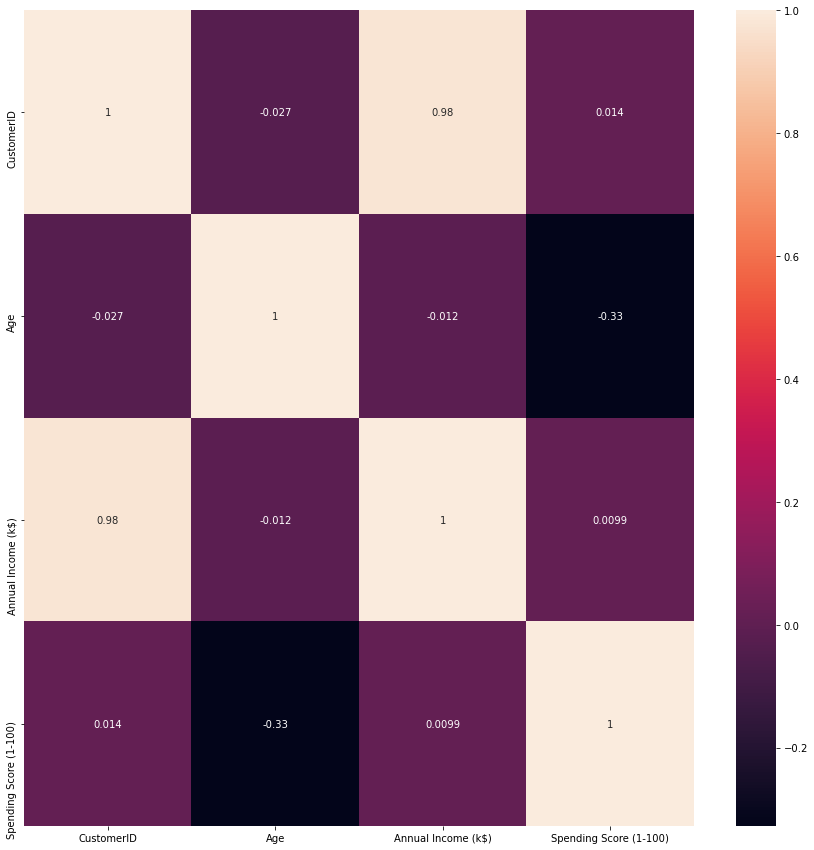

In [611]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

### Checking for outliers

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

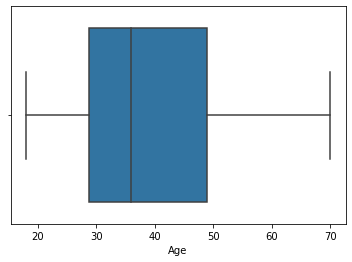

In [612]:
sns.boxplot(data['Age'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

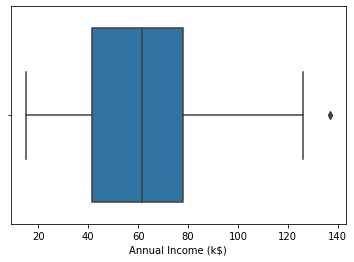

In [613]:
sns.boxplot(data['Annual Income (k$)'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

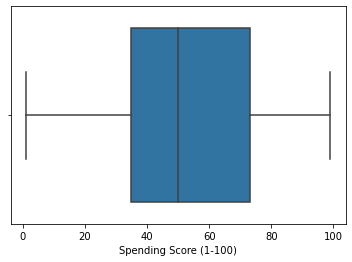

In [614]:
sns.boxplot(data['Spending Score (1-100)'])

### Replacing the outliers with meadian

In [615]:
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

In [616]:
# As we know that we can take value upyo range of (Q1-1.5*QPR, Q3+1.5*QPR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit is', lower_limit)
print('upper limit is', upper_limit)

lower limit is -13.25
upper limit is 132.75


In [617]:
outliers_detected = []
for x in data['Annual Income (k$)']:
    if ((x> upper_limit) or (x<lower_limit)):
         outliers_detected.append(x)
print(' outlier in the dataset is', outliers_detected)

 outlier in the dataset is [137, 137]


In [618]:
# replacing it with the median value 
data.loc[data['Annual Income (k$)'] >= 137, 'Annual Income (k$)'] = data["Annual Income (k$)"].median()

In [619]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


In [620]:
df=data.copy()

In [621]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


In [622]:
cust=df['Gender']

In [623]:
del df['Gender']

In [624]:
samples=df.values

In [625]:
samples

array([[  1. ,  19. ,  15. ,  39. ],
       [  2. ,  21. ,  15. ,  81. ],
       [  3. ,  20. ,  16. ,   6. ],
       [  4. ,  23. ,  16. ,  77. ],
       [  5. ,  31. ,  17. ,  40. ],
       [  6. ,  22. ,  17. ,  76. ],
       [  7. ,  35. ,  18. ,   6. ],
       [  8. ,  23. ,  18. ,  94. ],
       [  9. ,  64. ,  19. ,   3. ],
       [ 10. ,  30. ,  19. ,  72. ],
       [ 11. ,  67. ,  19. ,  14. ],
       [ 12. ,  35. ,  19. ,  99. ],
       [ 13. ,  58. ,  20. ,  15. ],
       [ 14. ,  24. ,  20. ,  77. ],
       [ 15. ,  37. ,  20. ,  13. ],
       [ 16. ,  22. ,  20. ,  79. ],
       [ 17. ,  35. ,  21. ,  35. ],
       [ 18. ,  20. ,  21. ,  66. ],
       [ 19. ,  52. ,  23. ,  29. ],
       [ 20. ,  35. ,  23. ,  98. ],
       [ 21. ,  35. ,  24. ,  35. ],
       [ 22. ,  25. ,  24. ,  73. ],
       [ 23. ,  46. ,  25. ,   5. ],
       [ 24. ,  31. ,  25. ,  73. ],
       [ 25. ,  54. ,  28. ,  14. ],
       [ 26. ,  29. ,  28. ,  82. ],
       [ 27. ,  45. ,  28. ,  32. ],
 

### KMeans Clustering

In [626]:
from sklearn.cluster import KMeans

In [627]:
ks=range(1,10)
inertias=[]

for k in ks:
    #create aKMeans instance with k clusters mode
    model=KMeans(n_clusters=k)
    
    # fit model to samples_
    model.fit(samples)
    
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)

In [628]:
inertias

[963664.3950000001,
 381387.0783578357,
 267877.894470046,
 191434.57924154063,
 153391.76421727403,
 119020.86469094202,
 101158.74755667037,
 85525.0865281737,
 76478.01501747813]

In [629]:
import matplotlib.pyplot as plt 

In [630]:
%matplotlib inline

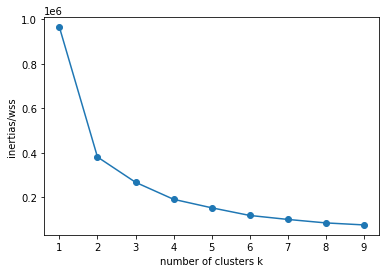

In [631]:
#plot ks vs intertias/WSS
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters k')
plt.ylabel('inertias/wss')
plt.show()

In [632]:
model=KMeans(n_clusters=5)

In [633]:
labels=model.fit_predict(samples)

In [634]:
from sklearn.metrics import silhouette_score

score = silhouette_score(samples, labels, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.427


In [635]:
df2=pd.DataFrame({'labels':labels,'varieties':cust})

In [636]:
ct=pd.crosstab(df2['labels'],df2['varieties'])

In [637]:
ct

varieties,Female,Male
labels,,
0,22,12
1,38,28
2,21,18
3,17,19
4,14,11


In [638]:
df2

,labels,varieties
0,4,Male
1,4,Male
2,0,Female
3,4,Female
4,0,Female
...,...,...
195,2,Female
196,3,Female
197,2,Male
198,3,Male


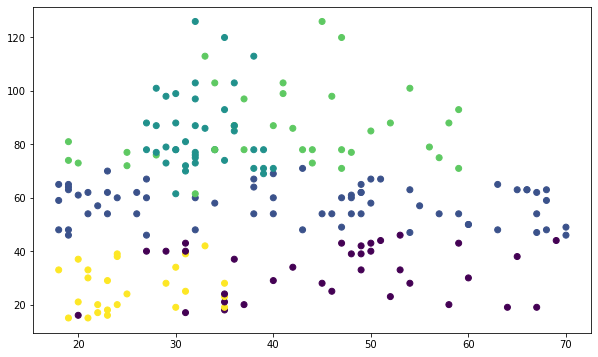

In [641]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Annual Income (k$)'],c=labels)

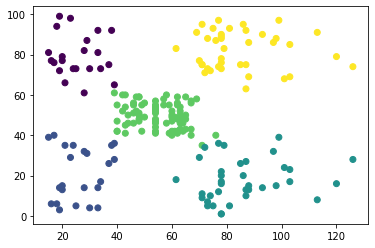

In [654]:
clustering_data=df[["Annual Income (k$)","Spending Score (1-100)"]]

cd = model.fit_predict(clustering_data)

plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=cd)

### Hierarchical Clustering

In [643]:
# replacing categorical features
data['Gender'] = np.where(data['Gender'] == 'Male',0,1)

In [644]:
from sklearn.preprocessing import normalize

In [645]:
data_scaled=normalize(data) #normal the data since units are different 

In [646]:
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)

In [647]:
data_scaled.shape

(200, 5)

In [648]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

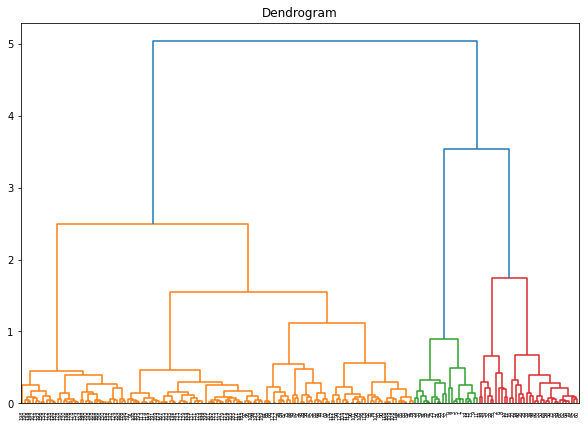

In [649]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))

In [650]:
from sklearn.cluster import AgglomerativeClustering

In [651]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [652]:
cluster.fit_predict(data_scaled)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

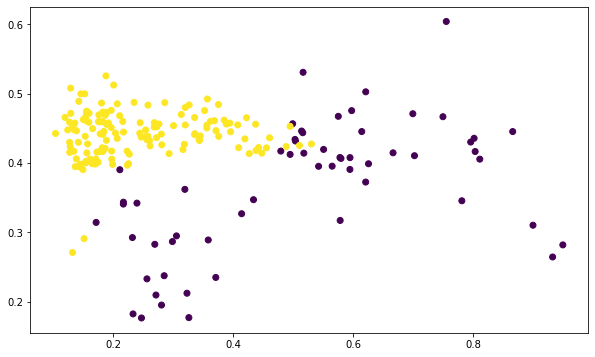

In [653]:
plt.figure(figsize=(10,6))
plt.scatter(data_scaled['Age'],data_scaled['Annual Income (k$)'],c=cluster.labels_)